In [23]:
import pandas as pd

ddi_path = 'gs://derma-datasets-2/raw/ddidiversedermatologyimages/ddi_metadata.csv'
df = pd.read_csv(
    ddi_path,
    storage_options={'token': 'secrets/apcomp215.json'}
)

In [24]:
df

,Unnamed: 0,DDI_ID,DDI_file,skin_tone,malignant,disease
0,0,1,000001.png,56,True,melanoma-in-situ
1,1,2,000002.png,56,True,melanoma-in-situ
2,2,3,000003.png,56,True,mycosis-fungoides
3,3,4,000004.png,56,True,squamous-cell-carcinoma-in-situ
4,4,5,000005.png,12,True,basal-cell-carcinoma
...,...,...,...,...,...,...
651,651,652,000652.png,34,False,pyogenic-granuloma
652,652,653,000653.png,34,False,melanocytic-nevi
653,653,654,000654.png,34,False,acral-melanotic-macule
654,654,655,000655.png,34,True,squamous-cell-carcinoma


In [25]:
# size
df.shape

(656, 6)

In [26]:
# missing data
df.isnull().sum()

Unnamed: 0    0
DDI_ID        0
DDI_file      0
skin_tone     0
malignant     0
disease       0
dtype: int64

78 diseases present


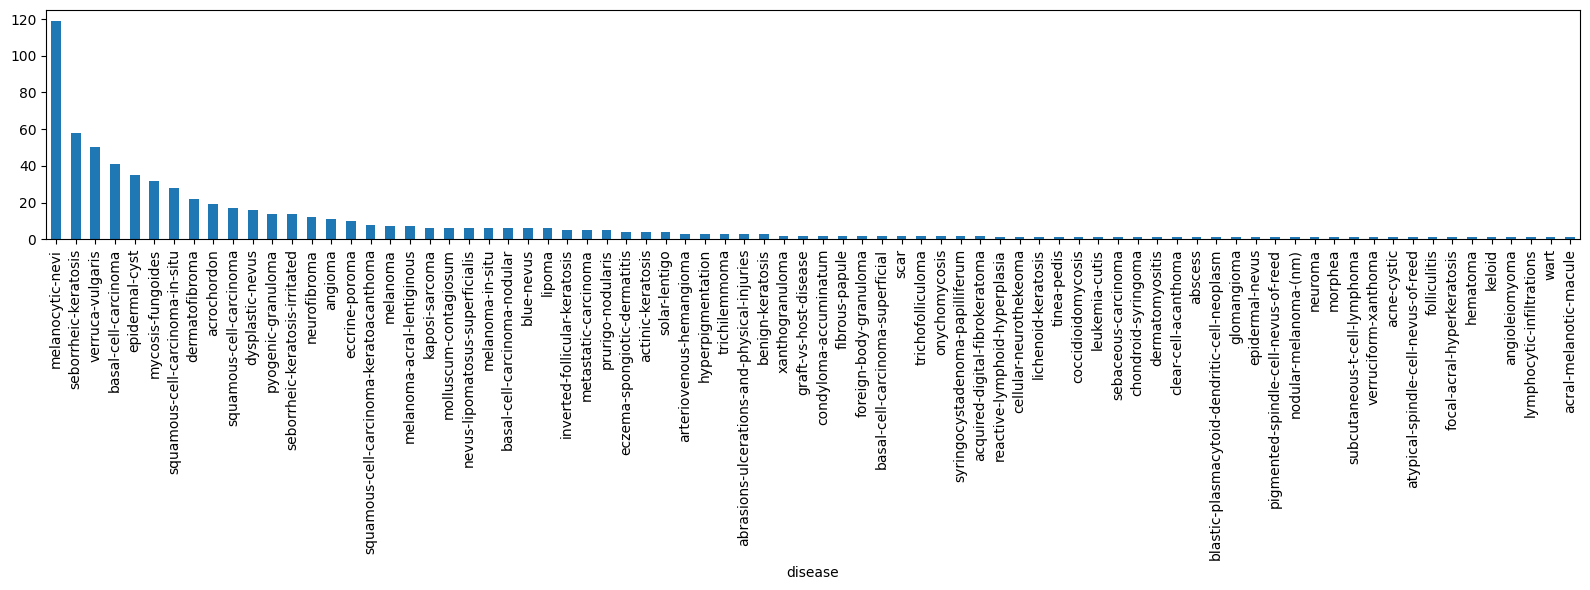

In [27]:
# Label distribution
import matplotlib.pyplot as plt

df_disease_count = df['disease'].value_counts()
print(f'{len(df_disease_count)} diseases present')

plt.figure(figsize=(16,6))
df_disease_count.plot.bar()
plt.tight_layout()
plt.show()

In [28]:
# Low representation diseases
df_low_representation = df_disease_count[df_disease_count < 5]
print(f'{len(df_low_representation)} diseases have less than 5 images')
print(df_low_representation)

49 diseases have less than 5 images
disease
eczema-spongiotic-dermatitis                    4
actinic-keratosis                               4
solar-lentigo                                   4
arteriovenous-hemangioma                        3
hyperpigmentation                               3
trichilemmoma                                   3
abrasions-ulcerations-and-physical-injuries     3
benign-keratosis                                3
xanthogranuloma                                 2
graft-vs-host-disease                           2
condyloma-accuminatum                           2
fibrous-papule                                  2
foreign-body-granuloma                          2
basal-cell-carcinoma-superficial                2
scar                                            2
trichofolliculoma                               2
onychomycosis                                   2
syringocystadenoma-papilliferum                 2
acquired-digital-fibrokeratoma                  2
reacti

<Axes: xlabel='malignant'>

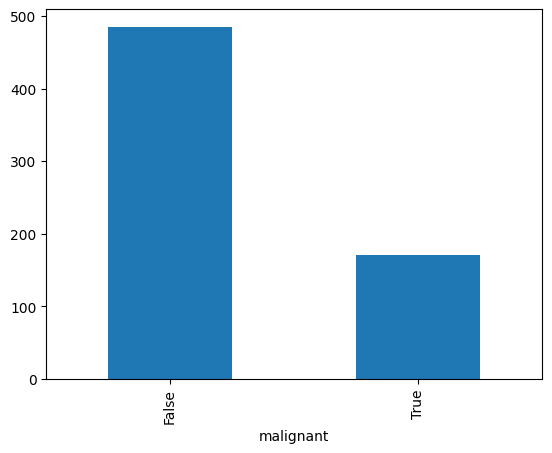

In [ ]:
# Malignant vs. non-malignant
df['malignant'].value_counts().plot.bar()

skin_tone
34    241
12    208
56    207
Name: count, dtype: int64


<Axes: xlabel='skin_tone'>

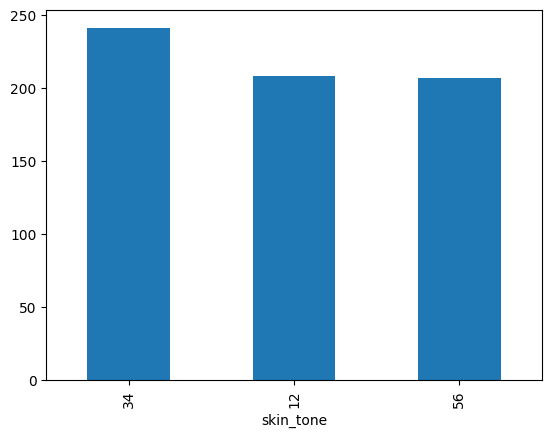

In [31]:
# Skin tone
print(df['skin_tone'].value_counts())
df['skin_tone'].value_counts().plot.bar()


Discrete Fitzpatrick classifications (FST I–II (12), FST III–IV (34), FST V–VI (56))
- Matches the paper